In [1]:
%matplotlib notebook
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data file path
fp = r'/dls/science/groups/e02/Sample_data/sample_EELS_EDS_new/EDS Spectrum Image.dm4'
SI = hs.load(fp)

<IPython.core.display.Javascript object>


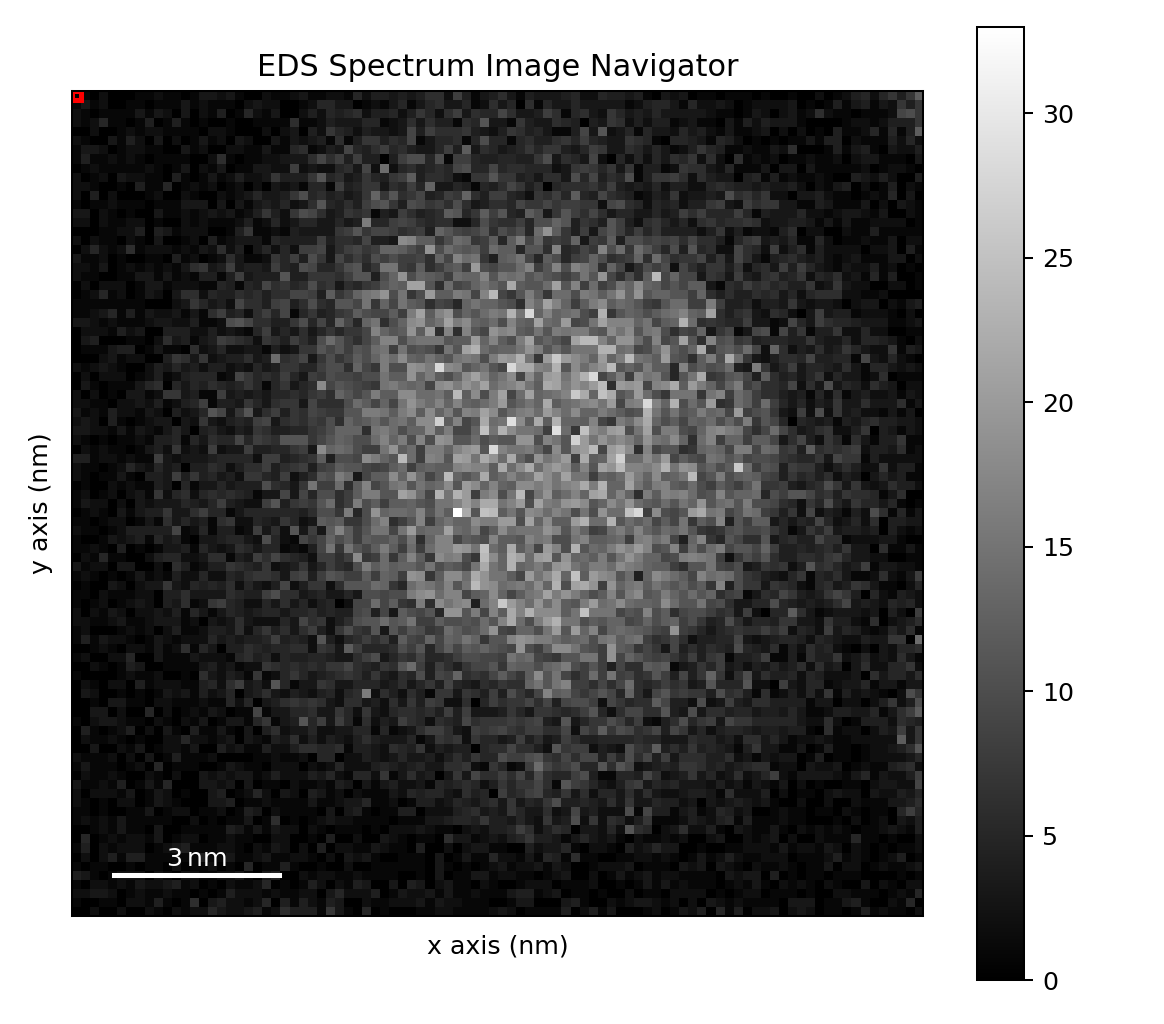

<IPython.core.display.Javascript object>


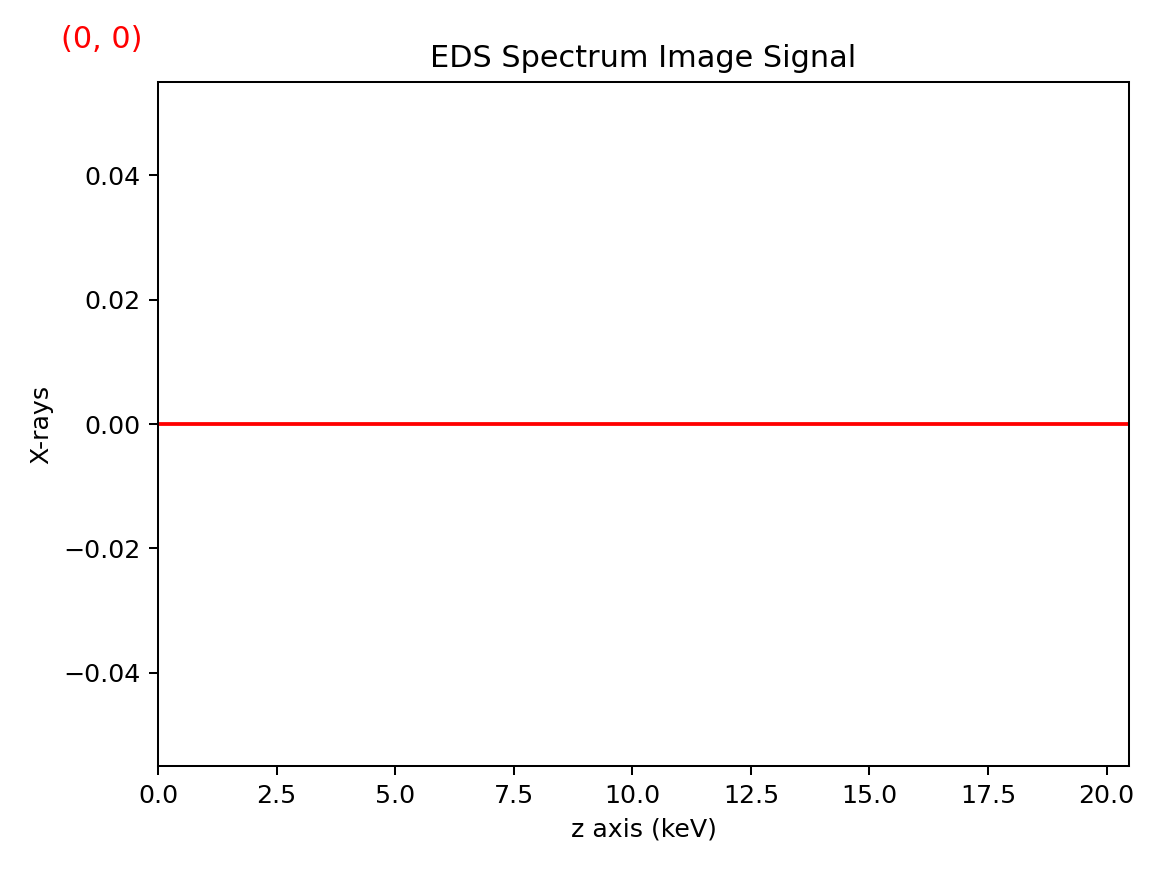

In [3]:
SI.plot()

<IPython.core.display.Javascript object>


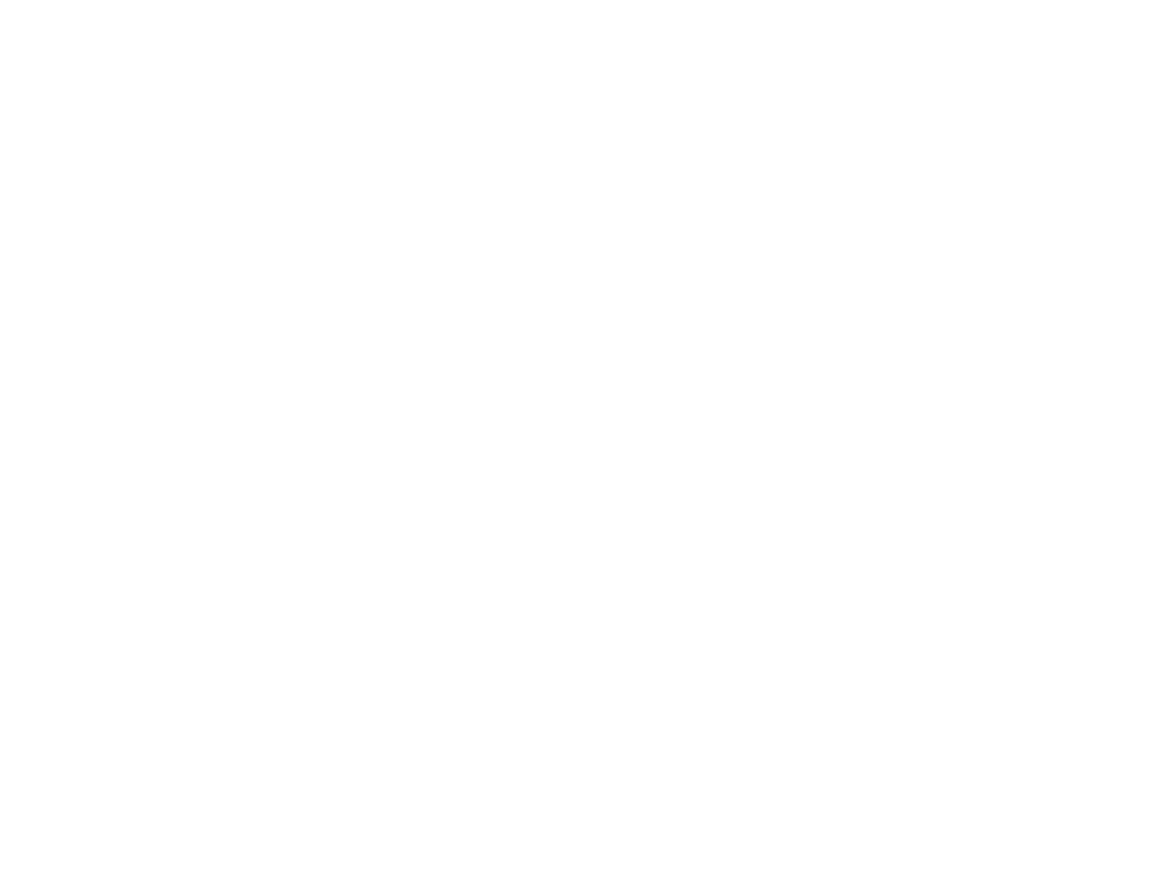

In [4]:
SI_sum = SI.sum()
SI_sum.plot()

<IPython.core.display.Javascript object>


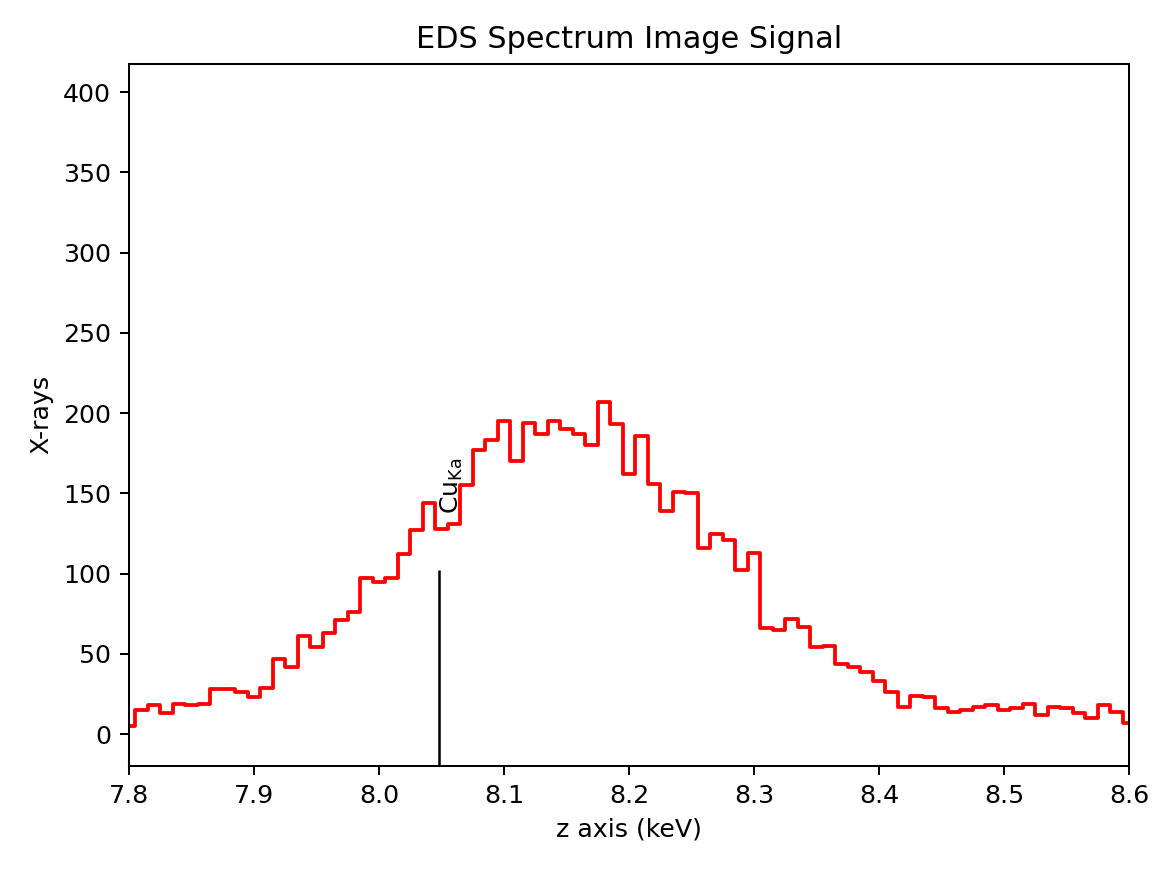

(7.8, 8.6)

In [5]:
#add Cu peak for calibration
SI_sum.add_elements(['Cu'])
SI_sum.add_lines(['Cu_Ka'])
SI_sum.plot(True)
plt.xlim([7.8, 8.6])

<IPython.core.display.Javascript object>


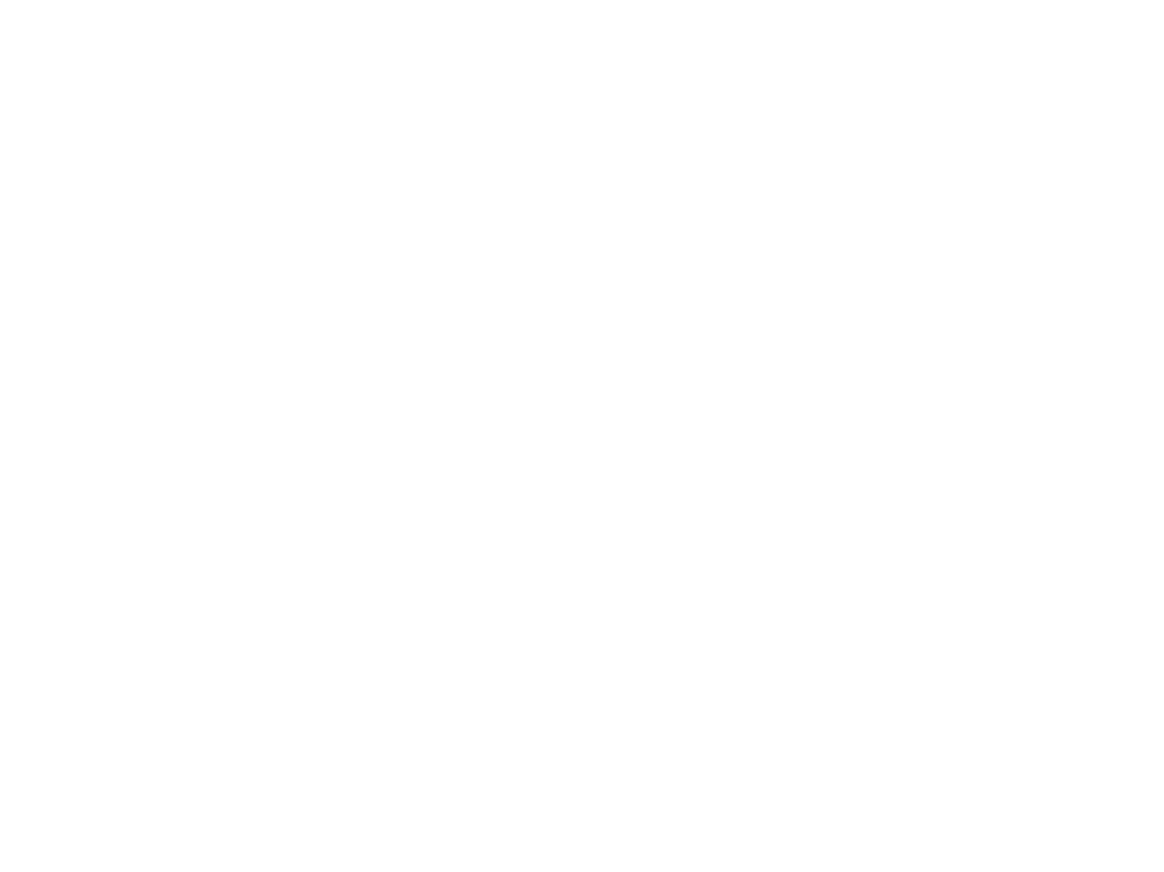

<bound method EDSModel.free_xray_lines_width of <EDSTEMModel, title: EDS Spectrum Image>>

In [6]:
#fit to Cu peak
SI_sum_Cu = SI_sum.isig[7.5:8.6]
SI_sum_Cu.plot(True)
m_Cu = SI_sum_Cu.create_model()
real_Cu_pos = m_Cu.components.Cu_Ka.centre.value # get expected Cu position
m_Cu.fix_background() # set background to zero
m_Cu.free_xray_lines_energy()
m_Cu.free_xray_lines_width
#results = m_Cu.fit()

In [7]:
gauss_cen = m_Cu.components.Cu_Ka.centre.value
gauss_ampl = m_Cu.components.Cu_Ka.A.value
gauss_sigma = m_Cu.components.Cu_Ka.sigma.value
line_name =  m_Cu.components.Cu_Ka.name

In [8]:
#copy Gaussian component parameters and into Lorentzian
lor_component = hs.model.components1D.Lorentzian(A = gauss_ampl, gamma = gauss_sigma, centre = gauss_cen )
lor_component.name = line_name


In [9]:
#add lorentzian to model and delete gaussian
m_Cu.remove(-1)
m_Cu.append(lor_component)

In [10]:
#fit
results = m_Cu.fit()

<IPython.core.display.Javascript object>


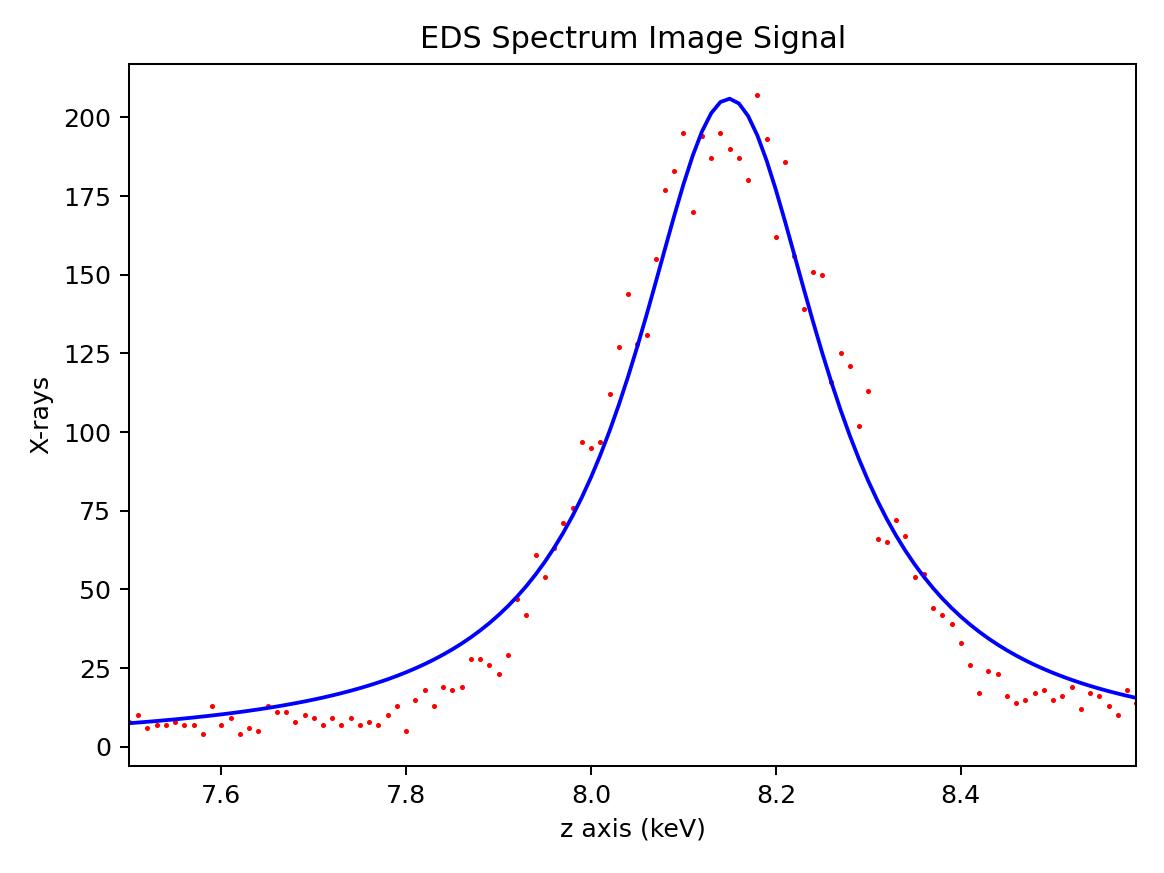

A :  8138.773153516059
gamma :  0.1257668997011184
centre :  8.149074516362365


In [11]:
m_Cu.plot()
print('A : ' , m_Cu.components.Cu_Ka.A.value)
print('gamma : ' , m_Cu.components.Cu_Ka.gamma.value)
print('centre : ' , m_Cu.components.Cu_Ka.centre.value)

In [12]:
#save fit model values to text file
#first build x_axis
min_x = SI_sum_Cu.axes_manager[0].offset
step_x = SI_sum_Cu.axes_manager[0].scale
n_x = SI_sum_Cu.axes_manager[0].size
max_x = min_x + (n_x * step_x)
x_vals = np.arange(min_x,max_x, step_x)
#and save
header_txt = 'A : ' + str(m_Cu.components.Cu_Ka.A.value) \
+ '; gamma : ' + str(m_Cu.components.Cu_Ka.gamma.value)  \
+ '; centre : ' + str(m_Cu.components.Cu_Ka.centre.value)

np.savetxt('lor_fit.txt', np.array([x_vals, m_Cu()]).T, delimiter= ',', header = header_txt)